# Project

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


## Importing Dataset

In [2]:
dataset=pd.read_csv("gym custumers features and churn/gym_churn_us.csv")
dataset.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Analysis of Data 

In [3]:
dataset.value_counts(subset='Age')


Age
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: count, dtype: int64

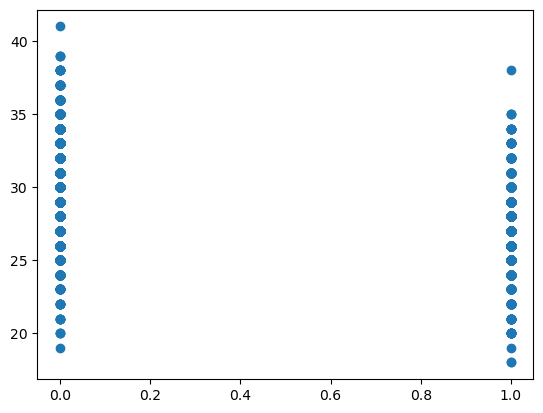

In [4]:
plt.scatter(dataset['Churn'],dataset['Age'])

<BarContainer object of 4000 artists>

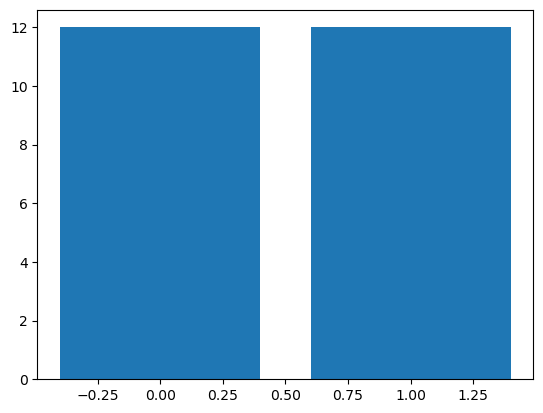

In [5]:
plt.bar(dataset['Churn'],dataset['Month_to_end_contract'])


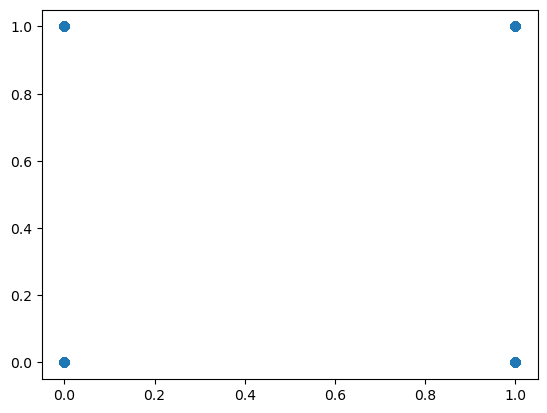

In [6]:
plt.scatter(dataset['gender'],dataset['Churn'])


## Evaluating models

In [9]:
x=dataset.drop(['Churn'],axis=1)
y=dataset['Churn']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
# from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
bagging=BaggingClassifier(n_estimators=10000)
ada = AdaBoostClassifier(n_estimators=10000)
extra_trees=ExtraTreesClassifier(n_estimators=10000)
gradient=GradientBoostingClassifier(n_estimators=10000)
# logistic=LogisticRegression(penalty='elasticnet')
mlpc=MLPClassifier(hidden_layer_sizes=[8],learning_rate='adaptive',verbose=True,max_iter=2000)
clfs={
    'bgc':bagging,
    'ada':ada,
    'etc':extra_trees,
    'gb':gradient,
    # 'lr':logistic,
    'mlpc':mlpc
}
for name,clf in clfs.items():
    print(f'Training {name}')
    clf.fit(xtrain,ytrain)
    print('Trained...')
    ypred=clf.predict(xtest)
    print(f'accuracy: {accuracy_score(ytest,ypred)}')
    print(f'precision: {precision_score(ytest,ypred)}')
    print('------------------------------------------------------------------------------------------------\n')

Training bgc
Trained...
accuracy: 0.92
precision: 0.8622222222222222
------------------------------------------------------------------------------------------------

Training ada


d:\IDEs\anaconda\envs\gym-customer-churn\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Trained...
accuracy: 0.91125
precision: 0.8611111111111112
------------------------------------------------------------------------------------------------

Training etc
Trained...
accuracy: 0.9125
precision: 0.8792270531400966
------------------------------------------------------------------------------------------------

Training gb
Trained...
accuracy: 0.9425
precision: 0.91324200913242
------------------------------------------------------------------------------------------------

Training mlpc
Iteration 1, loss = 16.74061024
Iteration 2, loss = 12.25787913
Iteration 3, loss = 7.24857007
Iteration 4, loss = 2.61674353
Iteration 5, loss = 0.99321103
Iteration 6, loss = 0.90475966
Iteration 7, loss = 0.77442023
Iteration 8, loss = 0.69828068
Iteration 9, loss = 0.64177959
Iteration 10, loss = 0.59336590
Iteration 11, loss = 0.55379493
Iteration 12, loss = 0.52223595
Iteration 13, loss = 0.49748960
Iteration 14, loss = 0.47817953
Iteration 15, loss = 0.46300666
Iteration 16, loss = 

In [ ]:
pickle.dump(gradient,open('gradient_model_94.pkl','wb'))